                     date     price_usd     price_eur        spread  \
0 2025-04-18 12:04:45.084  84593.663159  74384.984483  10208.678676   
1 2025-04-18 13:07:32.287  84618.694912  74406.995428  10211.699483   
2 2025-04-18 14:04:59.488  84543.300637  74340.699660  10202.600978   
3 2025-04-18 15:03:49.491  84541.695666  74339.288374  10202.407291   
4 2025-04-18 16:06:10.557  84382.340272  74199.163830  10183.176442   
5 2025-04-18 17:07:26.835  84455.829946  74263.784844  10192.045102   
6 2025-04-18 18:04:51.703  84543.023546  74340.456008  10202.567539   
7 2025-04-18 19:03:48.592  84599.593330  74390.199007  10209.394323   
8 2025-04-18 20:07:34.135  84535.969656  74334.253374  10201.716282   
9 2025-04-18 21:04:55.138  84495.668395  74298.815628  10196.852766   

   cambio_implicito  
0          1.137241  
1          1.137241  
2          1.137241  
3          1.137241  
4          1.137241  
5          1.137241  
6          1.137241  
7          1.137241  
8          1.137241 

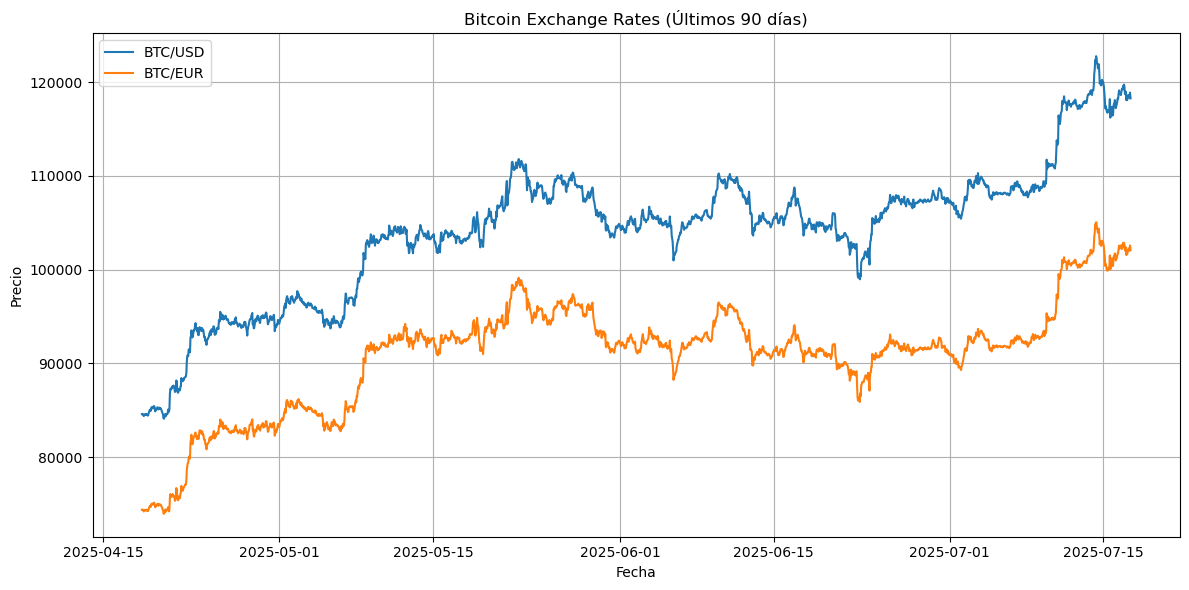

In [43]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

def get_btc_data(vs_currency='usd', days=90):
    url = 'https://api.coingecko.com/api/v3/coins/bitcoin/market_chart'
    params = {
        'vs_currency': vs_currency,
        'days': days
    }
    response = requests.get(url, params=params)
    data = response.json()
    prices = data['prices']
    df = pd.DataFrame(prices, columns=['timestamp', f'price_{vs_currency}'])
    df['date'] = pd.to_datetime(df['timestamp'], unit='ms')
    df = df[['date', f'price_{vs_currency}']]
    return df

btc_usd = get_btc_data('usd')
btc_eur = get_btc_data('eur')


btc_data = pd.merge(btc_usd, btc_eur, on='date')
#Añado el spread y el cambio_implicito
btc_data['spread'] = btc_data['price_usd'] - btc_data['price_eur']
btc_data['cambio_implicito'] = btc_data['price_usd'] / btc_data['price_eur']

#   Me daba error por el directorio pero no se por que
##btc_data.to_csv('data/btc_exchange_rates.csv', index=False)
##print("✅ Archivo guardado: data/btc_exchange_rates.csv")
#  Pongo temporalmente el siguiente print para hacerme una idea de como sale
print(btc_data.head(10))

plt.figure(figsize=(12, 6))
plt.plot(btc_data['date'], btc_data['price_usd'], label='BTC/USD')
plt.plot(btc_data['date'], btc_data['price_eur'], label='BTC/EUR')
plt.title('Bitcoin Exchange Rates (Últimos 90 días)')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


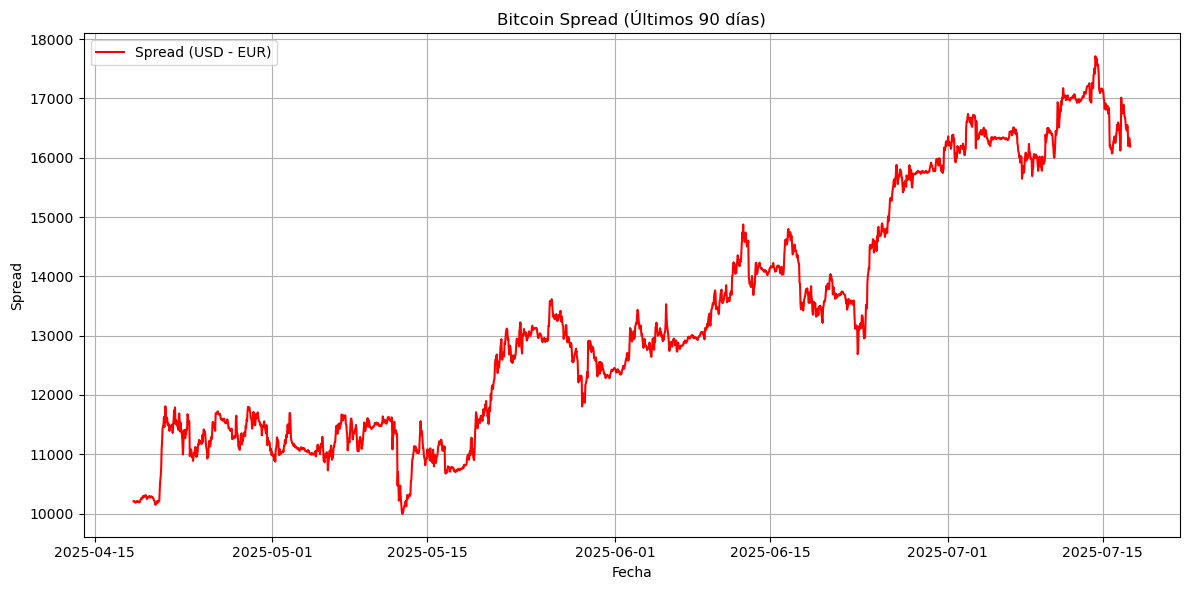

In [44]:
## Bitcoin Spread (Últimos 90 días)

plt.figure(figsize=(12, 6))
plt.plot(btc_data['date'], btc_data['spread'], label='Spread (USD - EUR)', color='red')
plt.title('Bitcoin Spread (Últimos 90 días)')
plt.xlabel('Fecha')
plt.ylabel('Spread')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

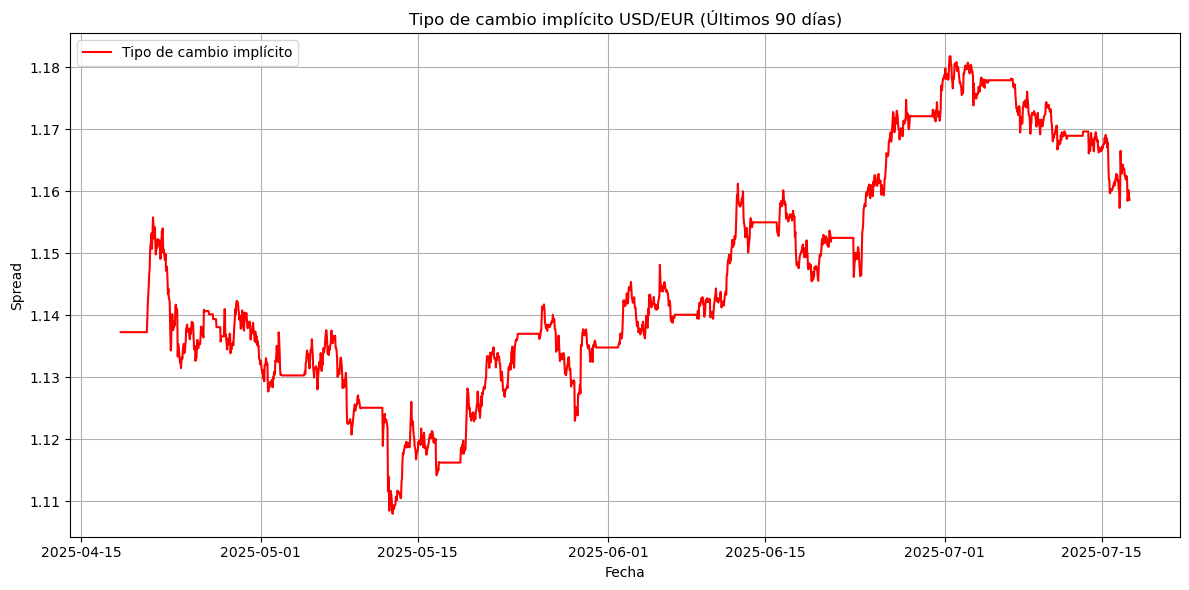

In [45]:
##Tipo de cambio implícito USD/EUR (Últimos 90 días)

plt.figure(figsize=(12, 6))
plt.plot(btc_data['date'], btc_data['cambio_implicito'], label='Tipo de cambio implícito', color='red')
plt.title('Tipo de cambio implícito USD/EUR (Últimos 90 días)')
plt.xlabel('Fecha')
plt.ylabel('Spread')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

📊 Resumen diario:
  date_nohour  price_usd_min  price_usd_max  price_eur_min  price_eur_max  \
0  2025-04-18   84382.340272   84618.694912   74199.163830   74406.995428   
1  2025-04-19   84430.134169   85450.837626   74241.190008   75138.715992   
2  2025-04-20   84093.833676   85279.665185   73945.473921   74988.200470   
3  2025-04-21   85140.019303   88183.227345   74370.487982   76695.774685   
4  2025-04-22   87530.850240   92890.820730   76083.040460   81893.569355   
5  2025-04-23   92765.401962   94294.964514   81363.142580   82854.642497   
6  2025-04-24   91979.557464   93692.840588   80822.529123   82696.674045   
7  2025-04-25   93056.129837   95501.306905   81988.964316   84004.095569   
8  2025-04-26   94103.964853   95078.209054   82538.587572   83355.065878   
9  2025-04-27   93780.927382   94915.789311   82438.736932   83402.504067   

     usd_range    eur_range  
0   236.354640   207.831598  
1  1020.703457   897.525984  
2  1185.831510  1042.726549  
3  3043.208041

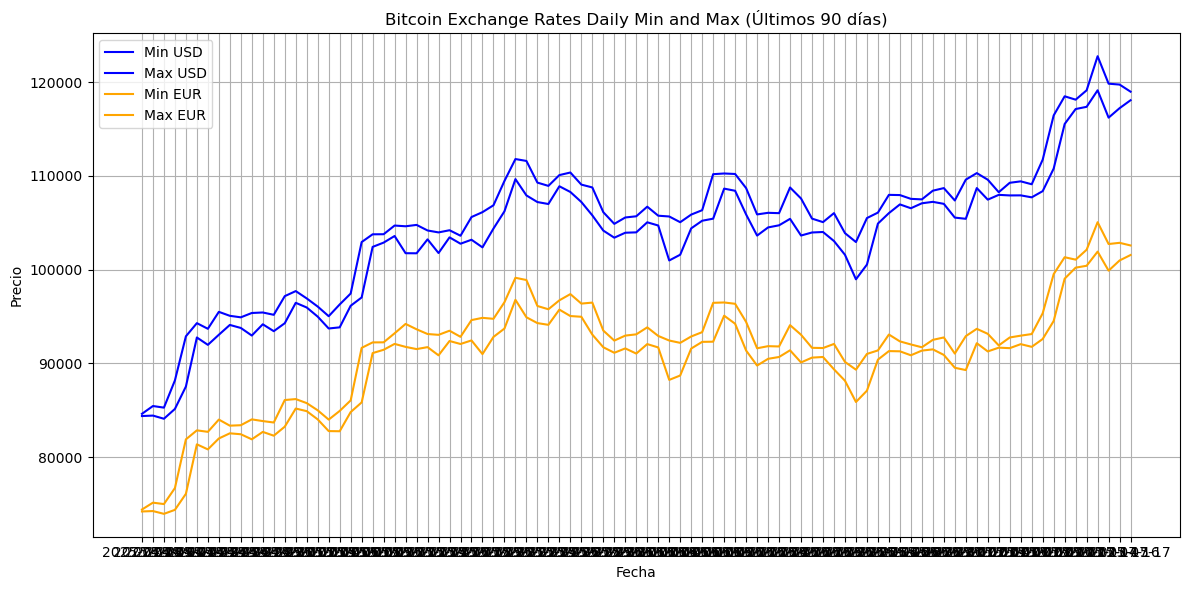

In [46]:
#DATAFRAME DIARIO AGRUPADO POR MIN Y MAX

#Cambio la fecha pa quitar las horas
btc_data['date_nohour'] = btc_data['date'].dt.strftime('%Y-%m-%d')

#Agrupo por fecha sin hora 
daily_summary = btc_data.groupby('date_nohour').agg(
    price_usd_min=('price_usd', 'min'),
    price_usd_max=('price_usd', 'max'),
    price_eur_min=('price_eur', 'min'),
    price_eur_max=('price_eur', 'max')
).reset_index()



daily_summary['usd_range'] = daily_summary['price_usd_max'] - daily_summary['price_usd_min']
daily_summary['eur_range'] = daily_summary['price_eur_max'] - daily_summary['price_eur_min']

print("📊 Resumen diario:")
print(daily_summary.head(10))


plt.figure(figsize=(12, 6))
plt.plot(daily_summary['date_nohour'], daily_summary['price_usd_min'], label='Min USD', color='blue')
plt.plot(daily_summary['date_nohour'], daily_summary['price_usd_max'], label='Max USD', color='blue')
plt.plot(daily_summary['date_nohour'], daily_summary['price_eur_min'], label='Min EUR', color='orange')
plt.plot(daily_summary['date_nohour'], daily_summary['price_eur_max'], label='Max EUR', color='orange')
plt.title('Bitcoin Exchange Rates Daily Min and Max (Últimos 90 días)')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

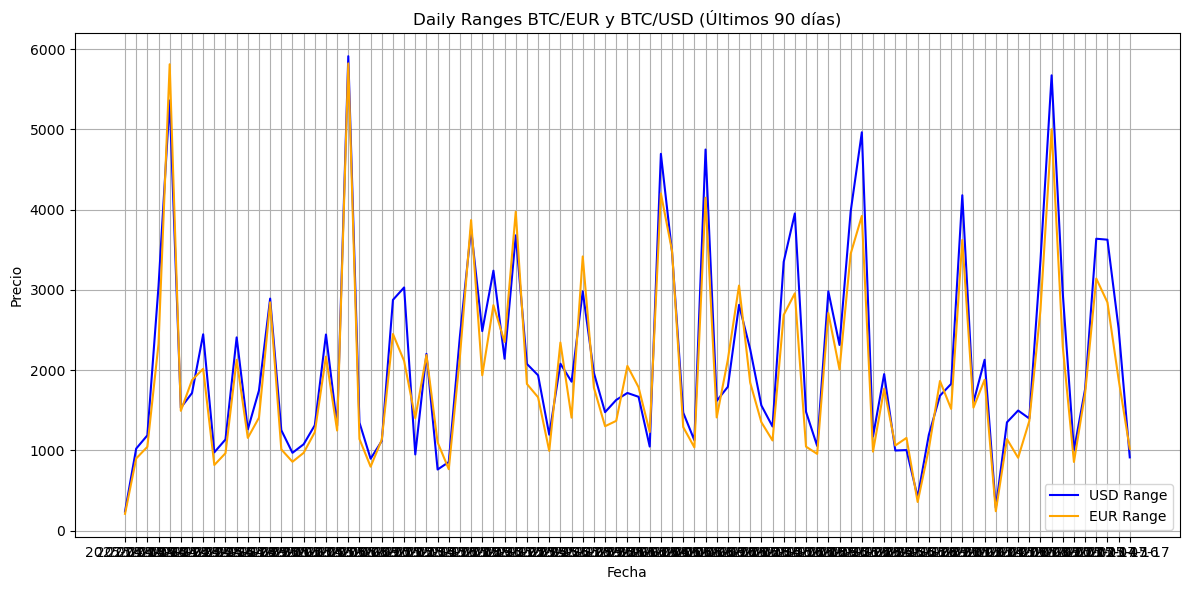

In [47]:
##Daily Ranges BTC/EUR y BTC/USD (Últimos 90 días)

plt.figure(figsize=(12, 6))
plt.plot(daily_summary['date_nohour'], daily_summary['usd_range'], label='USD Range', color='blue')
plt.plot(daily_summary['date_nohour'], daily_summary['eur_range'], label='EUR Range', color='orange')
plt.title('Daily Ranges BTC/EUR y BTC/USD (Últimos 90 días)')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()